# **CSE655 Homework 1**

### **Part 1: Training a deep feed forward network for multidimensional regression.**
Assume that you are given a polynomial with multiple (8) inputs and multiple outputs (6) of the form:
\begin{align*}
(y_1​, y_2​, …, y_6​) = P(x_1​, x_2​, …, x_8​)
\end{align*}

\begin{align*}
y_1 &= x_1 x_3 + 1.2 x_1 x_5 - x_6 x_7 x_8 - 2 x_1^2 x_8 + x_5 \\
y_2 &= x_1 x_5 x_6 - x_3 x_4 - 3 x_2 x_3 + 2 x_2^2 x_4 - 2 x_7 x_8 - 1 \\
y_3 &= 2 x_3^2 - x_5 x_7 - 3 x_1 x_4 x_6 - x_1^2 x_2 x_4 - 1 \\
y_4 &= -x_6^3 + 2 x_1 x_3 x_8 - x_1 x_4 x_7 - 2 x_5^2 x_2 x_4 - x_8 \\
y_5 &= x_1^2 x_5 - 3 x_3 x_4 x_8 + x_1 x_2 x_4 - 3 x_6 - x_1^2 x_7 + 2 \\
y_6 &= x_1^2 x_3 x_6 - x_3 x_5 x_7 + x_3 x_4 + 2.2 x_4 + x^2_2 x_3 - 2.1
\end{align*}



In [125]:
def function(x):
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    
    y1 = x1 * x3 + 1.2 * x1 * x5 - x6 * x7 * x8 - 2 * x1**2 * x8 + x5
    y2 = x1 * x5 * x6 - x3 * x4 - 3 * x2 * x3 + 2 * x2**2 * x4 - 2 * x7 * x8 - 1
    y3 = 2 * x3**2 - x5 * x7 - 3 * x1 * x4 * x6 - x1**2 * x2 * x4 - 1
    y4 = -x6**3 + 2 * x1 * x3 * x8 - x1 * x4 * x7 - 2 * x5**2 * x2 * x4 - x8
    y5 = x1**2 * x5 - 3 * x3 * x4 * x8 + x1 * x2 * x4 - 3 * x6 - x1**2 * x7 + 2
    y6 = x1**2 * x3 * x6 - x3 * x5 * x7 + x3 * x4 + 2.2 * x4 + x2**2 * x3 - 2.1
    
    return [y1, y2, y3, y4, y5, y6]

Training and validation data:
* Given the polynomials, generate 𝑁t instances of data pairs of the form: 
\begin{align*} {(x_1^t, x_2^t, x_3^t ... x_8^t), (y_1^t, y_2^t ... y_6^t)} \end{align*}
* When needed, add some noise to the training data from a normal distribution with mean 𝜇 and standard deviation 𝜎 such that the training data becomes:
\begin{align*} {(x_1^t, x_2^t, x_3^t ... x_8^t), (y_1^t + 𝑁(𝜇,𝜎), y_2^t + 𝑁(𝜇,𝜎) ... y_6^t + 𝑁(𝜇,𝜎))} \end{align*}
* Similarly, create an additional 𝑁v instances:
\begin{align*} {(x_1^v, x_2^v, x_3^v ... x_8^v), (y_1^v, y_2^v ... y_6^v)} \end{align*}
for validation of the trained model.

In [126]:
import numpy as np

def dataGenerator(xlist, func, size):
    output = []
    i = 0
    while i < size:
        y = func(xlist[i])
        output.append(y)
        i += 1
    return output

def noiseGenerator(xlist, mean, sigma):
    output = []
    for y in xlist:
        noise = np.random.normal(mean, sigma, len(y))
        output.append(y + noise)
    return output


#### **Model training:**

1. Choose 𝑁t to be 1000.
2. In your training data add some noise to 𝑦_i’s from a normal distribution with 𝜇 = 0.0 and 𝜎 = 0.001.

In [127]:
# Model training
Nt = 1000
Nv = 1000
noiseMean = 0.0
noiseStddev = 0.001

xt = np.random.random((Nt, 8)).tolist() # Training Input array
yt = dataGenerator(xt, function, Nt)    # Training Output array
yt = noiseGenerator(yt, noiseMean, noiseStddev)

xv = np.random.random((Nv, 8)).tolist() # Validation Input array
yv = dataGenerator(xv, function, Nv)    # Validation Output array


3. Build a feed forward network with exactly 3 hidden layers:
* Each layer should include exactly 6 nodes in the beginning.
* Use a combination of activation functions in these layers (use the same activation for each node at a given layer).
4. Define your loss function:
* Use MSE for loss function.
5. Train your algorithm with SGD.
* Use appropriate learning rates and the number of epochs.
* Report the training and validation errors.

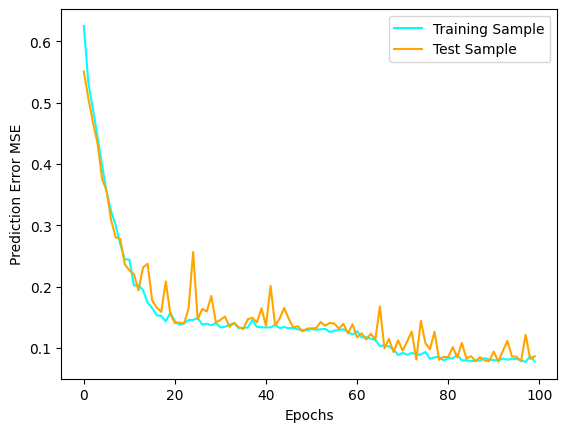

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

epochs = 100
learningRate = 0.09
model = Sequential()

model.add(Dense(6, input_shape=(8,), activation='relu')) 
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='linear')) # Output layer : 6 neuron, linear

# Compile 
sgd = SGD(learning_rate=learningRate)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# Train
history = model.fit(
    np.array(xt), 
    np.array(yt), 
    validation_data=(np.array(xv), np.array(yv)),
    epochs=epochs, 
    batch_size=32, 
    verbose=0
)

# Plot
plt.plot(history.history['mse'], label='Training Sample', color ='cyan')
plt.plot(history.history['val_mse'], label='Test Sample', color ='orange')
plt.xlabel('Epochs')
plt.ylabel('Prediction Error MSE')
plt.legend()
plt.show()



In [129]:
# Evaluate performance
train_loss, train_mse = model.evaluate(np.array(xt), np.array(yt), verbose=0)
val_loss, val_mse = model.evaluate(np.array(xv), np.array(yv), verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training MSE: {train_mse:.4f}")
print(f"Validation Loss: {val_loss:.4f}, Validation MSE: {val_mse:.4f}")

Training Loss: 0.0831, Training MSE: 0.0831
Validation Loss: 0.0862, Validation MSE: 0.0862


6. Repeat Steps 2-4 with another set of activation functions (3 different combinations), learning
rates (3 different schemes) and number of epochs (after finding a reasonable number of
epochs in the first trial, increase by 50% for 2 times).

7. Choose your best parameters after Step 5.

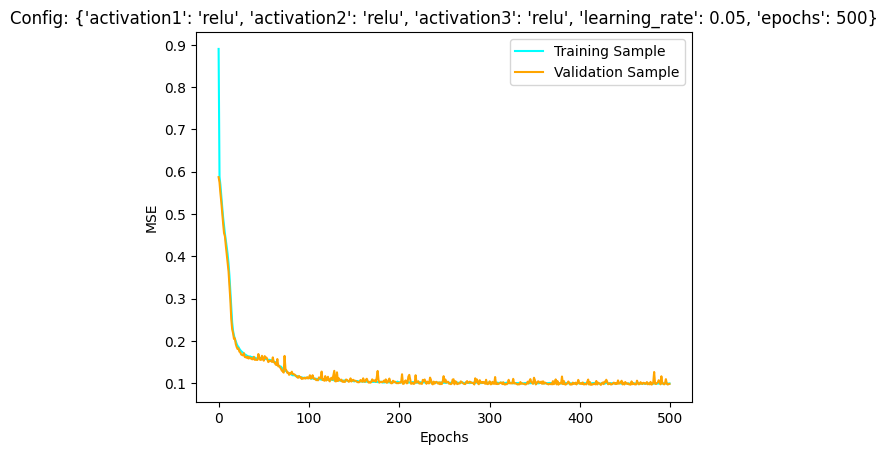

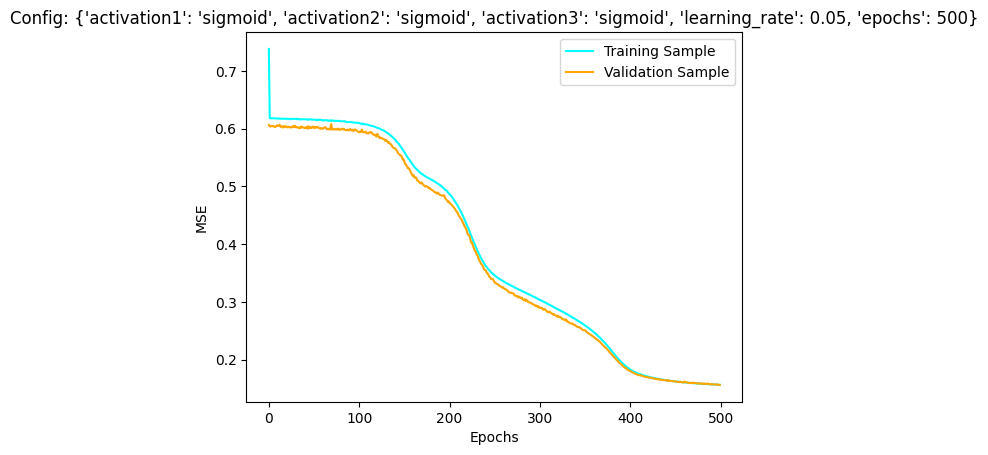

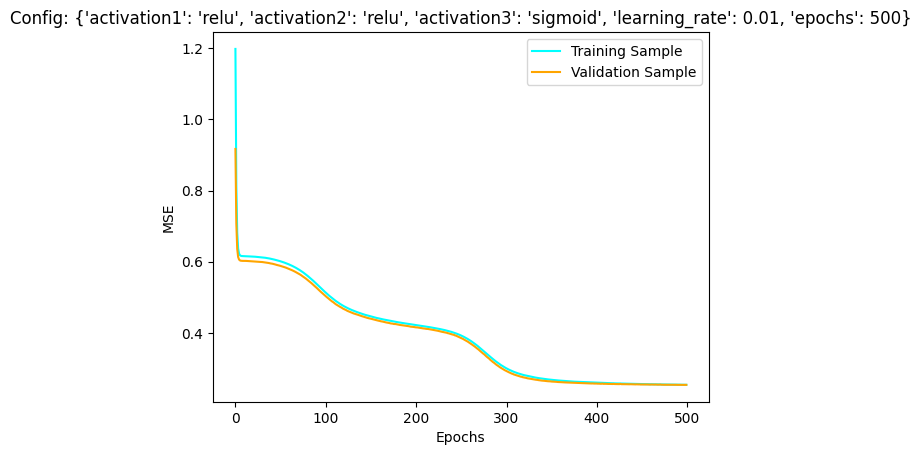

Best configuration: {'activation1': 'relu', 'activation2': 'relu', 'activation3': 'relu', 'learning_rate': 0.05, 'epochs': 500}
Validation MSE for best config: 0.0987013727426529


In [ ]:
# Different configurations
configs = [
    {"activation1": "relu", "activation2": "relu", "activation3": "relu", "learning_rate": 0.05, "epochs": 500},
    {"activation1": "sigmoid", "activation2": "sigmoid", "activation3": "sigmoid", "learning_rate": 0.05, "epochs": 500},
    {"activation1": "relu", "activation2": "relu", "activation3": "sigmoid", "learning_rate": 0.01, "epochs": 500},
]

# Store results to find the best parameters
results = []

for config in configs:
    model = Sequential()
    model.add(Dense(6, input_shape=(8,), activation=config["activation1"]))
    model.add(Dense(6, activation=config["activation2"]))
    model.add(Dense(6, activation=config["activation3"]))
    model.add(Dense(6, activation='linear'))  # Output layer

    sgd = SGD(learning_rate=config["learning_rate"])
    model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

    # Train the model
    history = model.fit(
        np.array(xt),
        np.array(yt),
        validation_data=(np.array(xv), np.array(yv)),
        epochs=config["epochs"],
        batch_size=16,
        verbose = 0
    )

    # Store configuration and final validation error
    valMse = history.history['val_mse'][-1]
    results.append({"config": config, "val_mse": valMse})

    # Plotting results for each configuration
    plt.plot(history.history['mse'], label='Training Sample', color='cyan')
    plt.plot(history.history['val_mse'], label='Validation Sample', color='orange')
    plt.title(f"Config: {config}")
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Step 7: Choose the best parameters
best_config = min(results, key=lambda x: x["val_mse"])
print("Best configuration:", best_config["config"])
print("Validation MSE for best config:", best_config["val_mse"])


8. Add new nodes at a time to each hidden layer:
* Start from the first hidden layer, add two nodes, train, and record results.
* Move to the second hidden layer, add two nodes, train, and record results.
* Move to the third hidden layer, add two nodes, train, and record results.
* Repeat Step 8 until bias and variance curve is drawn (see Figure 1 for a fictitious example from the first lecture).

Iteration :  0  Nodes :  6   6   6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0737 - mse: 0.0737 
Iteration :  0  val mse :  0.06917387247085571
Iteration :  1  Nodes :  8   6   6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0536 - mse: 0.0536
Iteration :  1  val mse :  0.05058389902114868
Iteration :  2  Nodes :  8   8   6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0566 - mse: 0.0566
Iteration :  2  val mse :  0.05586200952529907
Iteration :  3  Nodes :  8   8   8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0693 - mse: 0.0693
Iteration :  3  val mse :  0.06985197216272354
Iteration :  4  Nodes :  10   8   8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0475 - mse: 0.0475
Iteration :  4  val mse :  0.046027909964323044
Iteration :  5  Nodes :  10   10   8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0552 - mse: 0.0552
Iteration :  5  val mse :  0.05311059206724167
Iteration :  6  Nodes :  10   10   10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0357

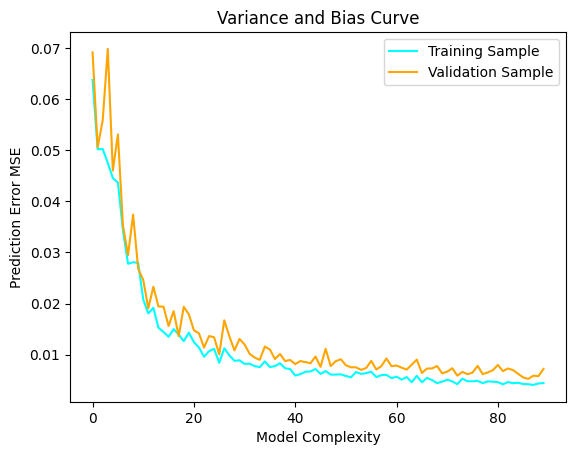

In [116]:
# Settings
learningRate = 0.09
epochs = 500
layerActivation = ['relu', 'relu', 'sigmoid']
layerNodes = [6, 6, 6]

# Initialize variables to store results
trainMseList = []
valMseList = []
iteration = 0 
maxIterations = 90 # Total iterations

# Iterate through hidden layers
while iteration < maxIterations:
    for n in range(3):
        print("Iteration : ", iteration, " Nodes : ", layerNodes[0], " ", layerNodes[1], " ", layerNodes[2])

        model = Sequential()
        model.add(Dense(layerNodes[0], input_shape=(8,), activation=layerActivation[0]))
        model.add(Dense(layerNodes[1], activation=layerActivation[1]))
        model.add(Dense(layerNodes[2], activation=layerActivation[2]))
        model.add(Dense(6, activation='linear'))  # Output layer
            
        # Compile model with fixed learning rate
        sgd = SGD(learning_rate=learningRate)
        model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
        
        # Train model and capture training/validation MSE
        history = model.fit(
            np.array(xt),
            np.array(yt),
            validation_data=(np.array(xv), np.array(yv)),
            epochs=epochs,  # Set a reasonable number of epochs for observing bias-variance trend
            batch_size=16,
            verbose=0
        )
        
        # Record the final training and validation MSE
        loss, accuracy = model.evaluate(np.array(xv), np.array(yv))
        trainMseList.append(history.history['mse'][-1])
        valMseList.append(loss)
        
        print("Iteration : ", iteration, " val mse : ", valMseList[iteration])

        layerNodes[n] += 2 # Add nodes to layer
        iteration += 1
        if(iteration >= maxIterations): break

# Plotting results for each configuration
plt.plot(trainMseList, label='Training Sample', color='cyan')
plt.plot(valMseList, label='Validation Sample', color='orange')
plt.title("Variance and Bias Curve")
plt.xlabel('Model Complexity')
plt.ylabel('Prediction Error MSE')
plt.legend()
plt.show()
